Higor Grigorio dos Santos
<br>

<center>

# Atividades - Segmentação Parte 1

<center>

#### 1. Implementar detector de ponto conforme slide 17.

Detecção de pontos: uso de derivadas de segunda ordem (laplaciano):

matriz laplaciana:

$$
\begin{bmatrix}
0 & -1 & 0 \\
-1 & -4 & -1 \\
0 & -1 & 0
\end{bmatrix}
$$

or use:

$$
\begin{bmatrix}
-1 & -1 & -1 \\
-1 & -8 & -1 \\
-1 & -1 & -1
\end{bmatrix}
$$

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def make_laplacian_mask() -> np.ndarray:
    return np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    # return np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])


Aplicando o filtro laplaciano na imagem:

In [34]:
def laplacian(img: np.ndarray) -> np.ndarray:
    mask = make_laplacian_mask()
    return cv2.filter2D(img, -1, mask)

Pode-se assumir que o ponto ocorre quando:

$$
\begin{align}
g(x,y) = 1 & \text{ se } |R(x,y)| >= T \\
g(x,y) = 0 & \text{ caso contrário}
\end{align}
$$

Onde $R(x,y)$ é o resultado da resposta da máscara no ponto central $(x, y)$ de uma região e $T$ é um limiar não negativo que regula a intensidade da resposta que será considerada ponto isolado.

In [35]:
def detect_points(img: np.ndarray, t: float) -> np.ndarray:
    lap = laplacian(img)
    return np.where(np.abs(lap) >= t, 1, 0)

##### 1.1. Tirar uma foto de uma imagem com um fundo branco e fazer alguns pontos com caneta preta.

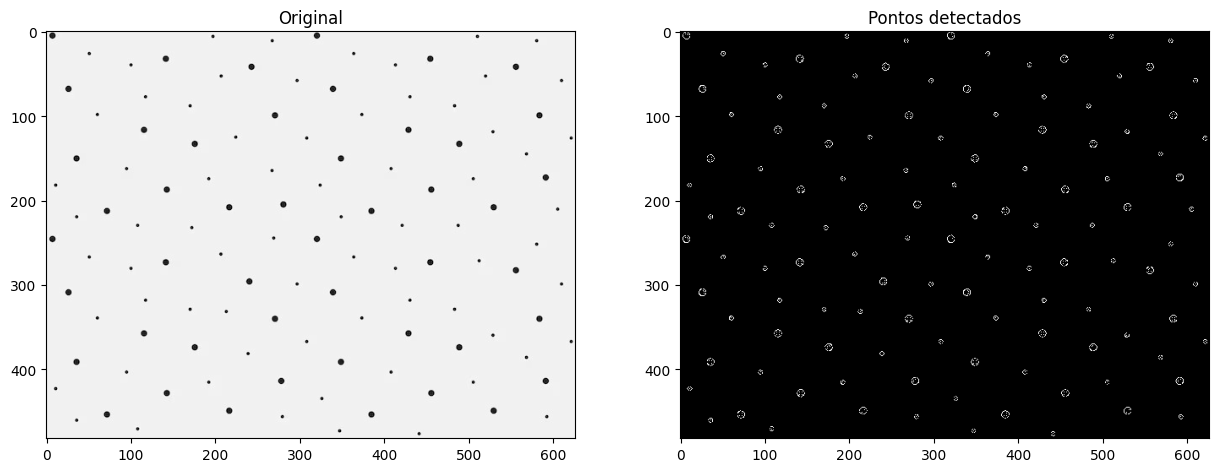

In [36]:
def exec_1_1():
    img = cv2.imread('images/ponto.jpg', cv2.IMREAD_GRAYSCALE)
    points = detect_points(img, 100)

    _, ax = plt.subplots(1, 2, figsize=(15, 15))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Original')
    ax[1].imshow(points, cmap='gray')
    ax[1].set_title('Pontos detectados')


exec_1_1()
del exec_1_1

#### 2. Implementar limiarização, definir o limiar.

In [ ]:
def threshold(img: np.ndarray, t: float) -> np.ndarray:
    return np.where(img >= t, 255, 0).astype(np.uint8)

##### 2.1. Utilizar a imagem da impressão digital.